In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
# Read dataset into a dataframe
cars = pd.read_csv("imports-85.data")

In [3]:
# Let's take a look at the head of our data
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


This dataset is missing column headers. We'll add them in manually by looking at the documentation at https://archive.ics.uci.edu/ml/datasets/automobile.

In [4]:
# Add column names matching the documentation
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# Select columns that are numeric and can be used as features
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Our goal is to predict a car's market price using its attributes. We will use the price column as the target column.

# Data Cleaning

In [7]:
# Clean up any missing values from our dataset
numeric_cars.isnull().sum()

# Replace all "?" with NaN
numeric_cars = numeric_cars.replace("?", np.nan)

In [8]:
# Recast columns into numeric type
numeric_cars = numeric_cars.astype('float')

# Check missing values count
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
numeric_cars.shape

(205, 14)

Since we are using price as the target column, we should remove the rows with missing values as they will not be useful for our prediction.

In [10]:
# Remove rows with missing values in price and check missing value count
numeric_cars = numeric_cars.dropna(subset = ["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

The 37 missing value observations in the normalized-losses column representsabout 20% of the 201 observations in this cleaned up dataset. Instead of removing these values, we will replace these missing values with the mean for the column.

In [11]:
# Fill in missing values with column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
# Normalize numeric columns (except target column) so all values range from 0 to 1 so as not to bias features containing large values
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [13]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Build a univariate k-nearest nieghbors model

Let's start by building a simple modelusing one variable to understand the features better before moving on to more complex models.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_column, target_column, df):
    # Create an instance of the KNeighborsRegressor class
    knn= KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Split data set into training and test setin 50%/50% distribution
    # Divide number of rows in data set into two and round
    last_train_row = int(len(rand_df)/2)
    # Select first half of data set as training set
    # Select second half of data set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit KNN model using default k value
    knn.fit(train_df[[train_column]], train_df[target_column])
    
    # Make predictions based on the model
    predicted_labels = knn.predict(test_df[[train_column]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_column], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [15]:
# Use previous function to train and test univariate models using different numeric columns
rmse_results = {}
train_columns = numeric_cars.columns.drop('price')

# For each column, use knn_train_test() function and append RSME to rsme_results
for col in train_columns:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_value

# Convert rmse_results into a series for easier view to compare RMSE values
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Now that we know how each column performs as a feature in a univariate model, we can optimize for the k value by updating the logic for our previous function.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_column, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Split data set into training and test setin 50%/50% distribution
    # Divide number of rows in data set into two and round
    last_train_row = int(len(rand_df)/2)
    # Select first half of data set as training set
    # Select second half of data set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    # Fit KNN model using k value
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_column]], train_df[target_column])
    
        # Make predictions based on the model
        predicted_labels = knn.predict(test_df[[train_column]])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_column], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

# Use updated function to train and test univariate models using different numeric columns
k_rmse_results = {}
train_columns = numeric_cars.columns.drop('price')

# For each column, use knn_train_test() function and append RSME to rsme_results
for col in train_columns:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_value

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

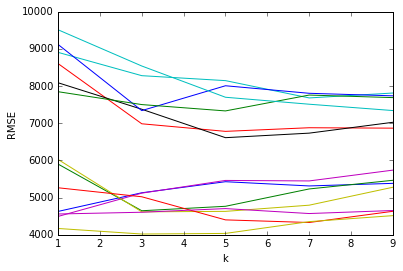

In [17]:
# Visualize the results using a scatter plot
import matplotlib.pyplot as plt
% matplotlib inline

for k, v in k_rmse_results.items():
    x = [1,3,5,7,9]
    y = [v[i] for i in x]
    plt.plot(x,y)
    plt.xlabel("k")
    plt.ylabel("RMSE")

From our testing of different k values, we can see how some features perform better with a k-value of 5 while other features perform better with a k-value of 9.

Next, we can modify our function to w ork with multiple columns.

## Multivariate Model

In [18]:
# Let's see  which column is the best to choose as a feature of our model by taking  the average of RSME from all the k-values
feature_avg_rmse = {}
for k, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
feature_avg_rmse_series = pd.Series(feature_avg_rmse)
feature_avg_rmse_series.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

By taking the average of the RMSE from the different k-values for each feature that we tested, we see that horsepower and width may be the best features to start building our multivariate model from.

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_columns, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Split data set into training and test setin 50%/50% distribution
    # Divide number of rows in data set into two and round
    last_train_row = int(len(rand_df)/2)
    
    # Select first half of data set as training set
    # Select second half of data set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    # Fit KNN model using k value
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_columns], train_df[target_column])
    
        # Make predictions based on the model
        predicted_labels = knn.predict(test_df[train_columns])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_column], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

# Use updated function to train and test univariate models using best features from previous step
two_best_features = ['horsepower', 'width']
three_best_features = ['horsepower', 'width', 'curb-weight']
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']

k_rmse_results = {}
# Use knn_train_test() function on all columns passed in and append RSME to rsme_results
two_feature_rmse_value = knn_train_test(two_best_features, 'price', numeric_cars)
three_feature_rmse_value = knn_train_test(three_best_features, 'price', numeric_cars)
four_feature_rmse_value = knn_train_test(four_best_features, 'price', numeric_cars)
five_feature_rmse_value = knn_train_test(five_best_features, 'price', numeric_cars)

# Add RMSE value to dictionary
k_rmse_results["two_feature"] = two_feature_rmse_value
k_rmse_results["three_feature"] = three_feature_rmse_value
k_rmse_results["four_feature"] = four_feature_rmse_value
k_rmse_results["five_feature"] = five_feature_rmse_value

# Create a dataframe to view results easily
multi_rmse_results = pd.DataFrame.from_dict(k_rmse_results)
multi_rmse_results

,five_feature,four_feature,three_feature,two_feature
5,3665.546673,3358.69158,3305.94014,3589.313262


In [25]:
k_rmse_results

{'five_feature': {5: 3665.546673045813},
 'four_feature': {5: 3358.6915801682458},
 'three_feature': {5: 3305.9401397969677},
 'two_feature': {5: 3589.3132622073304}}

We obtained the smallest RSME value when using the three best features with a k-value of 5 to build our model for predictions. We will not optimize using the top 3 models from our previous step and varying the hyperparameter from 1 to 25.

In [26]:
# Update the code to take in various values of k to optimize hyperparameter

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_columns, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Split data set into training and test setin 50%/50% distribution
    # Divide number of rows in data set into two and round
    last_train_row = int(len(rand_df)/2)
    
    # Select first half of data set as training set
    # Select second half of data set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = {}
    
    # Fit KNN model using k value
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_columns], train_df[target_column])
    
        # Make predictions based on the model
        predicted_labels = knn.predict(test_df[train_columns])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_column], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

# Use updated function to train and test univariate models using best features from previous step
two_best_features = ['horsepower', 'width']
three_best_features = ['horsepower', 'width', 'curb-weight']
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']

k_rmse_results = {}
# Use knn_train_test() function on all columns passed in and append RSME to rsme_results
two_feature_rmse_value = knn_train_test(two_best_features, 'price', numeric_cars)
three_feature_rmse_value = knn_train_test(three_best_features, 'price', numeric_cars)
four_feature_rmse_value = knn_train_test(four_best_features, 'price', numeric_cars)

# Add RMSE value to dictionary
k_rmse_results["two_feature"] = two_feature_rmse_value
k_rmse_results["three_feature"] = three_feature_rmse_value
k_rmse_results["four_feature"] = four_feature_rmse_value

# Create a dataframe to view results easily
multi_rmse_results = pd.DataFrame.from_dict(k_rmse_results)
multi_rmse_results


,four_feature,three_feature,two_feature
1,2600.746384,3013.010999,4061.961305
2,2725.432507,2813.285970,3497.499362
3,3108.858031,3171.585284,3402.869264
4,3217.313521,3182.313742,3587.004420
5,3358.691580,3305.940140,3589.313262
6,3633.168703,3522.506849,3680.062981
7,3896.127441,3774.377209,3756.927964
8,4002.838390,3978.969124,3937.770418
9,4055.530937,3992.923681,4078.348592
10,4128.678077,4076.238147,4163.828374


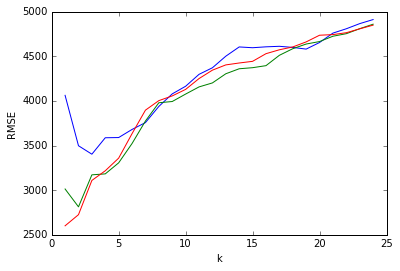

In [34]:
# Visualize the results using a scatter plot
import matplotlib.pyplot as plt
% matplotlib inline

for k, v in k_rmse_results.items():
    x = [i for i in range(1,25)]
    y = [v[i] for i in x]
    plt.plot(x,y)
    plt.xlabel("k")
    plt.ylabel("RMSE")

By running the simulation of all k-values to optimize our hyperparameter, in general a smaller k-value yields a smaller RMSE across all models. The two-feature model performs best with a k-value of 3. The three-feature model performs best with a k-value of 2. The four-feature model performs best with a k-value of 1. The optimal k-value is different between the different models because the predictions for the two-feature model have less data to model off of so is more accurate by comparing more observations as an average whereas the four-feature model has more data to model off of and can find similar observations and generate a good prediction off of the nearest observation.

## Conclusion

Through our analysis, we built several different models to optimize different hyperparameters. The model that takes in four features (shown in red) performs the best and gives us the smallest RSME in our predictions.

## Next Steps